In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2)

In [86]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout, Activation,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import cifar10
#from vit_keras import vit, utils
#import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2)
import warnings 
warnings.filterwarnings('ignore')

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



In [4]:
data1= unpickle("data_batch_1")

In [5]:
data2 = unpickle("data_batch_2")

In [6]:
data3= unpickle("data_batch_3")

In [7]:
data4 = unpickle("data_batch_4")

In [8]:
data5= unpickle("data_batch_5")

In [9]:
data6= unpickle("test_batch")

In [10]:
data1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [11]:
d1=data1[b"data"]

In [12]:
d2=data2[b"data"]

In [13]:
d3=data3[b"data"]

In [14]:
d4=data4[b"data"]

In [15]:
d5=data5[b"data"]

In [16]:
d6=data6[b"data"]

In [17]:
p1=data1[b"filenames"]

In [18]:
p2=data2[b"filenames"]

In [19]:
p3=data3[b"filenames"]

In [20]:
p4=data4[b"filenames"]

In [21]:
p5=data5[b"filenames"]

In [22]:
p6=data6[b"filenames"]

In [23]:
list3=p1+p2+p3+p4+p5+p6

In [24]:
#list1=np.array((data1, data2, data3, data4, data5))

In [25]:
list1=np.vstack((d1,d2,d3,d4,d5,d6))

In [26]:
list1

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [27]:
list1.shape

(60000, 3072)

In [28]:
list3

[b'leptodactylus_pentadactylus_s_000004.png',
 b'camion_s_000148.png',
 b'tipper_truck_s_001250.png',
 b'american_elk_s_001521.png',
 b'station_wagon_s_000293.png',
 b'coupe_s_001735.png',
 b'cassowary_s_001300.png',
 b'cow_pony_s_001168.png',
 b'sea_boat_s_001584.png',
 b'tabby_s_001355.png',
 b'muntjac_s_001000.png',
 b'arabian_s_001354.png',
 b'quarter_horse_s_000672.png',
 b'passerine_s_000343.png',
 b'camion_s_001895.png',
 b'trailer_truck_s_000335.png',
 b'dumper_s_000821.png',
 b'alley_cat_s_000200.png',
 b'accentor_s_000677.png',
 b'frog_s_001671.png',
 b'capreolus_capreolus_s_000051.png',
 b'tomcat_s_000772.png',
 b'pickerel_frog_s_000446.png',
 b'bufo_s_001242.png',
 b'cassowary_s_001246.png',
 b'toad_s_001748.png',
 b'cat_s_000081.png',
 b'chihuahua_s_000825.png',
 b'alces_alces_s_000959.png',
 b'stealth_bomber_s_000554.png',
 b'twinjet_s_000663.png',
 b'trucking_rig_s_001402.png',
 b'auto_s_000609.png',
 b'tabby_cat_s_000983.png',
 b'wapiti_s_000416.png',
 b'monoplane_s_000

In [29]:
print(len(list3))

60000


In [30]:
list1.shape

(60000, 3072)

In [31]:
print(list1)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]


In [32]:
df=pd.DataFrame(list1,list3)
df

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
b'leptodactylus_pentadactylus_s_000004.png',59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
b'camion_s_000148.png',154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
b'tipper_truck_s_001250.png',255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
b'american_elk_s_001521.png',28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
b'station_wagon_s_000293.png',170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'cabin_cruiser_s_000783.png',76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
b'tabby_cat_s_000494.png',81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
b'pekinese_s_002005.png',20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
b'convertible_s_002525.png',25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


In [33]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,131.015000,130.442783,131.372250,131.957367,132.593250,133.238633,133.750800,134.271883,134.854633,135.295817,...,115.053883,115.048417,115.113067,115.103267,115.104333,115.174983,115.180367,115.147517,115.184217,115.655183
std,73.728991,72.752014,72.565746,72.298265,71.981583,71.801504,71.621421,71.592074,71.389646,71.348348,...,64.083838,64.203443,64.294932,64.255532,64.378852,64.381283,64.593611,64.740230,65.075592,65.909789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,71.000000,72.000000,73.000000,74.000000,75.000000,76.000000,76.000000,77.000000,78.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,66.000000,65.000000,65.000000,65.000000,65.000000
50%,128.000000,127.000000,129.000000,130.000000,130.000000,131.000000,132.000000,133.000000,134.000000,134.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
75%,190.000000,189.000000,190.000000,190.000000,190.000000,191.000000,191.000000,192.000000,193.000000,193.000000,...,158.000000,158.000000,159.000000,158.000000,159.000000,158.000000,158.000000,159.000000,159.000000,160.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [34]:
df1=np.array(df)
df1

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [35]:
df1

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [36]:
image=data1[b"data"][0]
image=image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [37]:
image=image.transpose(1,2,0)
print(image.shape)
image

(32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

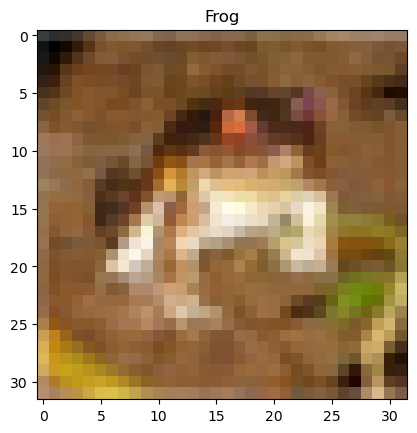

In [38]:
import matplotlib.pyplot as plt
plt.title("Frog")
plt.imshow(image)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

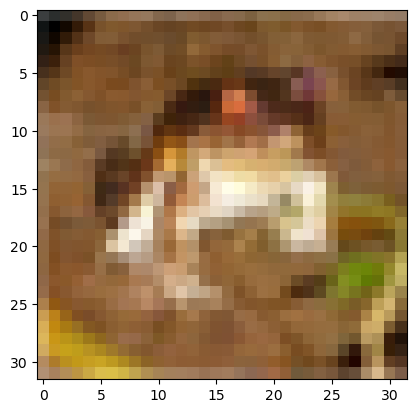

In [39]:
data=data1[b"data"]
data=data.reshape(len(data),3,32,32).transpose(0,2,3,1)
print(data)
plt.imshow(data[0])

In [40]:
classes =['Frog', 'Automobile', 'Truk', 'Deer', 'car', 'Car', 'Bird', 'Horse', 'Ship', 'Cat']
classes

['Frog',
 'Automobile',
 'Truk',
 'Deer',
 'car',
 'Car',
 'Bird',
 'Horse',
 'Ship',
 'Cat']

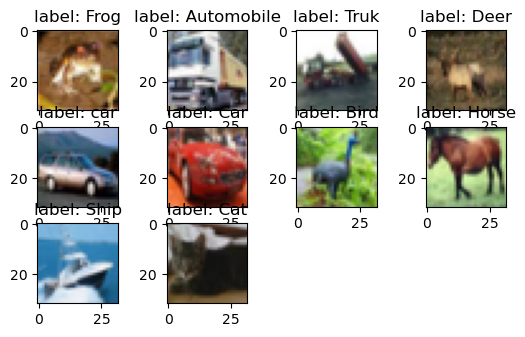

In [41]:
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(data[i])
    plt.title('label: '+str(classes[i]))
plt.show()


In [42]:
x=df.iloc[:,0:2970]/255.0

In [43]:
y=df.iloc[:,2970]/255.0

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.3, random_state=0)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((42000, 2970), (18000, 2970), (42000,), (18000,))

In [46]:
# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (y_train.shape, y_train))
print("ytest Shape: %s and value: %s" % (y_test.shape,y_test))

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# After one hot encoding
print("y_train Shape: %s and value: %s" % (y_train.shape, y_train[0]))
print("y_test Shape: %s and value: %s" % (y_test.shape, y_test[1]))

ytrain Shape: (42000,) and value: b'western_toad_s_000100.png'         0.305882
b'deer_s_001432.png'                 0.090196
b'tipper_truck_s_000144.png'         0.070588
b'rowing_boat_s_000360.png'          0.301961
b'tractor_trailer_s_001109.png'      0.200000
                                       ...   
b'puppy_s_000605.png'                0.345098
b'anuran_s_000138.png'               0.109804
b'mutt_s_001849.png'                 0.690196
b'rangifer_tarandus_s_000166.png'    1.000000
b'pilot_boat_s_000499.png'           0.541176
Name: 2970, Length: 42000, dtype: float64
ytest Shape: (18000,) and value: b'western_toad_s_000309.png'           0.058824
b'tipper_truck_s_000571.png'           0.392157
b'dredger_s_000370.png'                0.576471
b'pleasure_craft_s_000632.png'         0.000000
b'capreolus_capreolus_s_001425.png'    0.490196
                                         ...   
b'alauda_arvensis_s_000100.png'        0.517647
b'convertible_s_000051.png'            0.490196
b

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [49]:
x_train

array([[-0.58302687, -0.73456105, -0.87356732, ..., -0.53884306,
        -0.68904407, -0.80646986],
       [-1.1398862 , -0.84462645, -0.81840456, ...,  0.5742278 ,
        -1.12427779, -1.53154556],
       [ 0.55785566,  0.13220394, -0.03233523, ..., -0.60336891,
        -0.60844523, -1.01593618],
       ...,
       [ 1.06038725,  0.91641988,  1.38810584, ..., -0.36139698,
        -0.47948709,  0.4986664 ],
       [ 1.68515626,  1.71439399,  1.70529172, ...,  2.31642568,
         2.357592  ,  2.36775044],
       [ 0.65292921,  0.3110602 ,  0.3400134 , ...,  0.65488511,
         0.5199385 ,  0.4986664 ]])

In [50]:
x_test

array([[-1.7646552 , -1.76642413, -1.76996217, ..., -1.37767907,
        -1.34995454, -1.4348688 ],
       [ 1.10113306,  1.12279249,  0.94680376, ..., -0.37752844,
        -0.35052895, -0.25863489],
       [ 1.26411628,  1.30164876,  1.29157101, ...,  0.68714804,
         0.71337571,  0.70813272],
       ...,
       [ 0.04174214,  0.04965489, -0.37710248, ..., -0.7324206 ,
        -0.75352314, -0.54866517],
       [-0.32497011, -0.23926677, -0.29435834, ..., -1.26475884,
        -1.317715  , -0.99982338],
       [-1.57450811, -1.56005152, -1.5906832 , ..., -0.79694645,
        -1.01143942, -0.74201869]])

In [64]:
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

ann=models.Sequential()


In [70]:
from keras.layers import Dense
ann.add(Dense(input_dim=150,units=80,kernel_initializer="uniform",activation="relu"))
ann.add(Dense(units=50,kernel_initializer="uniform",activation="relu"))
ann.add(ConV2D(filters=60,kenal_size=(2,2),activation="relu"))
ann.add(MaxPooling2D(pool_size=2,strids=2 ))
ann.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))


In [71]:
ann.compile(optimizer="adam",loss="binary_crossentropy", metrics= ["accuracy"])
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 40)                2040      
                                                                 
 dense_12 (Dense)            (None, 80)                3280      
                                                                 
 dense_13 (Dense)            (None, 50)                4050      
                                                                 
 dense_14 (Dense)            (None, 30)                1530      
                                                                 
 dense_15 (Dense)            (None, 10)                310       
                                                                 
 dense_16 (Dense)            (None, 40)               

In [ ]:
ann.fit(x_train,y_train,epochs=100,batch_size=50)